<a href="https://colab.research.google.com/github/Suraj1682/Machine-Learning-Projects-/blob/main/DL_07_LSTM_Univariate_Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving RELIANCE_5yrs.csv to RELIANCE_5yrs.csv


In [ ]:
#----------------------------------------------------------------------------
df = pd.read_csv("RELIANCE_5yrs.csv")
#----------------------------------------------------------------------------
# Get close price data
data = df.filter(['Close']).values
print(data)
# Scale data between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)
print(scaled_data)
# Split data into training and testing sets
training_data_len = int(len(data) * 0.8)
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(10, len(train_data)):
    x_train.append(train_data[i-10:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train[1])
print(y_train[1])
print(x_train[2])
print(y_train[2])
print(x_train.shape)
# Reshape data for LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)



[[ 961.882324]
 [ 958.018921]
 [ 967.528809]
 ...
 [2362.100098]
 [2377.050049]
 [2420.5     ]]
[[0.04430507]
 [0.04231783]
 [0.04720949]
 ...
 [0.76454416]
 [0.77223407]
 [0.7945837 ]]
[0.04231783 0.04720949 0.04947697 0.05360428 0.05225398 0.04835597
 0.0367383  0.03123519 0.02537543 0.02410154]
0.02175764842428979
[0.04720949 0.04947697 0.05360428 0.05225398 0.04835597 0.0367383
 0.03123519 0.02537543 0.02410154 0.02175765]
0.014369200168214025
(974, 10)
(974, 10, 1)


# **Univariate Time Series:**

**Input:** In univariate time series data, you have only one variable or time series as input. This means you are using past values of a single variable to predict future values of that same variable.

**Output:** Similarly, the output is also a single variable, and you are predicting its future values.

**Example:** Predicting the daily temperature for a city based on its historical temperature data. In this case, you have a single time series of temperature values.

**LSTM Usage:** In the case of univariate time series data, you typically have a single input feature (e.g., the temperature at each time step) and a single output target (e.g., the predicted temperature at the next time step).

# **LSTM Syntax**
**units (or hidden_size):**

Description: The number of LSTM units or neurons in the layer.
Example:
tf.keras.layers.LSTM(units=64)

**return_sequences:**
Description: Determines whether the layer should return the full sequence of hidden states (True) or only the final hidden state (False).
Example:
tf.keras.layers.LSTM(units=64, return_sequences=True)

**input_shape:**
Description: The shape of the input data for the LSTM layer. It's typically specified only in the first layer of a Sequential model.
Example:
tf.keras.layers.LSTM(units=64, input_shape=(timesteps, input_features))

**activation:**
Description: The activation function applied to the recurrent activations. Common choices include 'tanh' (default) and 'sigmoid'.

The activation function is applied to the current input and the previous hidden state to calculate the candidate cell state (also known as the "new memory" candidate).
This function determines how the LSTM cell processes and transforms the information from the current input and previous hidden state to produce a candidate cell state.

Common choices for activation include 'tanh' (hyperbolic tangent), 'relu' (rectified linear unit), and 'sigmoid' functions.
Example:
tf.keras.layers.LSTM(units=64, activation='tanh')

**recurrent_activation:**
Description: The activation function used for the recurrent step.
The recurrent_activation function is applied to the recurrent connections within the LSTM cell, specifically to calculate how much of the previous cell state should be preserved and how much should be updated with the new candidate cell state.
It controls the flow of information from the previous cell state to the current cell state.

Common choices for recurrent_activation include 'hard_sigmoid' (a computationally efficient approximation of the sigmoid), 'sigmoid', and 'tanh'.
Common choices include 'hard_sigmoid' (default) and 'sigmoid'.
Example:

tf.keras.layers.LSTM(units=64, recurrent_activation='hard_sigmoid')
The hard sigmoid function is used to calculate the values of these gates. Specifically, it's applied to the weighted sum of inputs and recurrent connections, followed by a bias term, and then passed through the hard sigmoid function.

Mathematically, for the forget gate (f_t), input gate (i_t), and output gate (o_t):


f_t = hard_sigmoid(W_f * [h_t-1, x_t] + b_f)

i_t = hard_sigmoid(W_i * [h_t-1, x_t] + b_i)

o_t = hard_sigmoid(W_o * [h_t-1, x_t] + b_o)


**dropout:**
Description: Float between 0 and 1, representing the dropout rate for the input units during training.
Example:
tf.keras.layers.LSTM(units=64, dropout=0.2)

**recurrent_dropout:**
Description: Float between 0 and 1, representing the dropout rate for the recurrent units during training.
Example:
tf.keras.layers.LSTM(units=64, recurrent_dropout=0.2)

**kernel_initializer:**
Description: Initializer for the kernel weights matrix.
Example:
tf.keras.layers.LSTM(units=64, kernel_initializer='glorot_uniform')

**bias_initializer:**
Description: Initializer for the bias vector.
Example:
tf.keras.layers.LSTM(units=64, bias_initializer='zeros')

**return_state:**
Description: Determines whether the layer should return the hidden state and cell state along with the output. Useful when building custom architectures.
Example:
tf.keras.layers.LSTM(units=64, return_state=True)

In an LSTM (Long Short-Term Memory) neural network, the return_sequences parameter controls what the LSTM layer returns as output, and it's related to the hidden state and cell state.

Here's what return_sequences set to True and False means:

**return_sequences=True:**

When you set return_sequences=True in an LSTM layer, it means that the layer will return the full sequence of hidden states (output) for each time step in the input sequence. In this case, the LSTM layer will produce an output tensor of shape (batch_size, timesteps, units), where:

batch_size is the number of samples in your batch.
timesteps is the number of time steps in your input sequence.
units is the number of LSTM units or neurons in the layer.
The returned output contains information from all time steps and can be used for tasks where you need to maintain the sequence information, such as sequence-to-sequence tasks or when stacking multiple LSTM layers.
Sample Code
import tensorflow as tf

@# Define an LSTM layer with return_sequences=True
lstm_layer = tf.keras.layers.LSTM(units=64, return_sequences=True)

@# Input tensor of shape (batch_size, timesteps, input_dim)
input_data = tf.keras.layers.Input(shape=(10, 32))

@# Apply the LSTM layer to the input
output_sequence = lstm_layer(input_data)

@# The output_sequence will be of shape (batch_size, timesteps, 64)

**return_sequences=False:**

When you set return_sequences=False (which is the default behavior if not specified), the LSTM layer will only return the final hidden state and cell state after processing the entire input sequence. In this case, the LSTM layer will produce an output tensor of shape (batch_size, units).

The returned output contains information distilled from the entire input sequence and is often used in tasks where the LSTM's role is to summarize the sequence information into a fixed-size representation or context vector. For example, in many sequence classification tasks, you may only need the final hidden state to make a prediction based on the entire sequence.

In [ ]:
# Define LSTM model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(tf.keras.layers.LSTM(100, return_sequences=False))
model.add(tf.keras.layers.Dense(25))
model.add(tf.keras.layers.Dense(1))

# Compile and fit the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
31/31 [==============================] - 8s 25ms/step - loss: 0.0319 - accuracy: 0.0021
Epoch 2/100
31/31 [==============================] - 1s 26ms/step - loss: 0.0019 - accuracy: 0.0021
Epoch 3/100
31/31 [==============================] - 1s 17ms/step - loss: 0.0013 - accuracy: 0.0021
Epoch 4/100
31/31 [==============================] - 0s 15ms/step - loss: 0.0012 - accuracy: 0.0021
Epoch 5/100
31/31 [==============================] - 0s 15ms/step - loss: 0.0012 - accuracy: 0.0021
Epoch 6/100
31/31 [==============================] - 0s 15ms/step - loss: 0.0012 - accuracy: 0.0021
Epoch 7/100
31/31 [==============================] - 0s 15ms/step - loss: 0.0012 - accuracy: 0.0021
Epoch 8/100
31/31 [==============================] - 0s 15ms/step - loss: 0.0012 - accuracy: 0.0021
Epoch 9/100
31/31 [==============================] - 0s 15ms/step - loss: 0.0012 - accuracy: 0.0021
Epoch 10/100
31/31 [==============================] - 0s 15ms/step - loss: 0.0011 - accuracy: 0.0021

In [ ]:
# Create testing data set
test_data = scaled_data[training_data_len - 10:, :]
x_test = []
y_test = data[training_data_len:, :]

for i in range(10, len(test_data)):
    x_test.append(test_data[i-10:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Make predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Predict the future trend
future_data = df.filter(['Close'])
last_60_days = future_data[-10:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
future_prediction = model.predict(X_test)
future_prediction = scaler.inverse_transform(future_prediction)
print('Predicted price for the next day:', future_prediction[0][0])

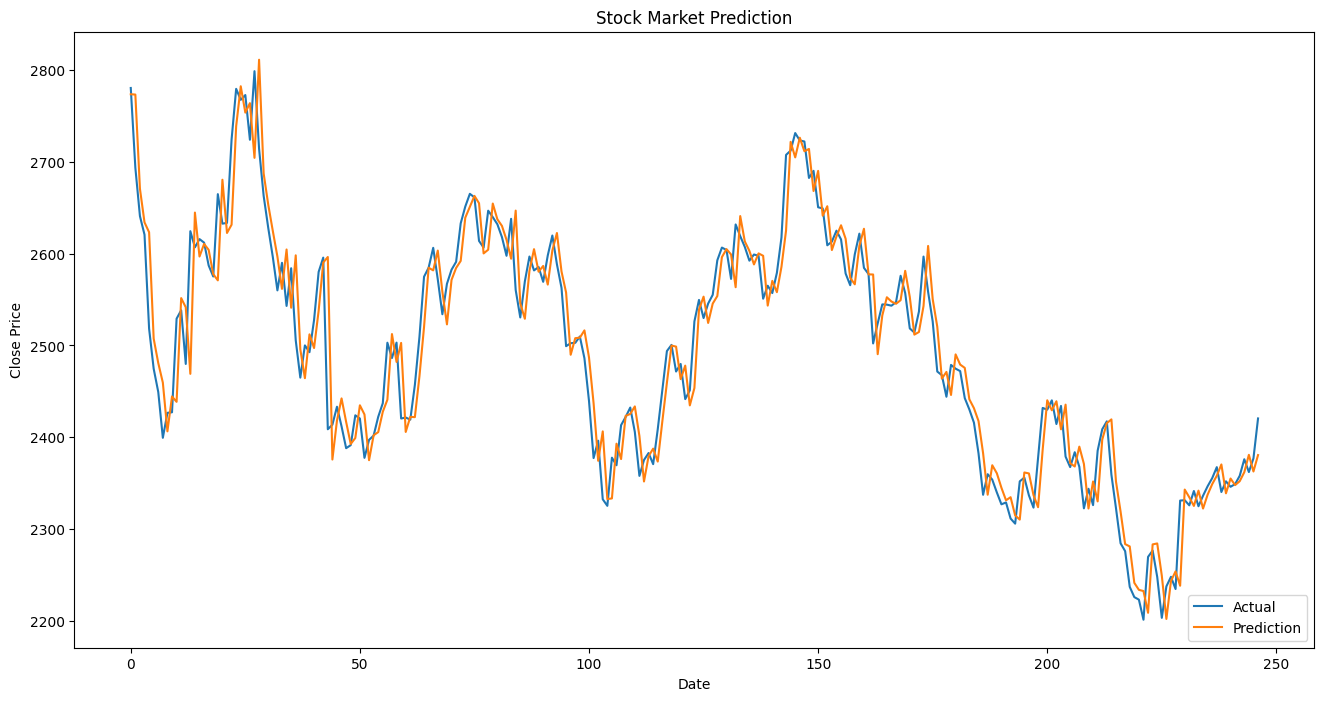

In [ ]:
# Plot the predictions and actual values
plt.figure(figsize=(16,8))
plt.title('Stock Market Prediction')
plt.plot(y_test)
plt.plot(predictions)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(['Actual', 'Prediction'], loc='lower right')
plt.show()

In [ ]:
# make predictions for the next 10 days
future_data = df.filter(['Close'])
last_60_days = future_data[-60:]
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_prices = []
for i in range(10):
    predicted_price = model.predict(X_test)
    predicted_prices.append(predicted_price[0][0])
    X_test = np.append(X_test, [predicted_price], axis=1)

# invert the scaling
predicted_prices = np.array(predicted_prices).reshape(-1, 1)
predicted_prices = scaler.inverse_transform(predicted_prices)

# print the predicted prices
print(predicted_prices)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
[[2445.7195]
 [2467.4167]
 [2486.9668]
 [2504.8755]
 [2521.8108]
 [2538.2854]
 [2554.6233]
 [2570.987 ]
 [2587.4265]
 [2603.926 ]]
